# BTA 419-OL1 Spring 2023
#### Rayan Waked - Final Project

# Executive Summary

### Business Question

We set out to answer a crucial question: "What is the effectiveness of our campaigns for individuals who have been previously contacted?" This question was selected due to its potential to shed light on the bank's marketing strategies and guide future decision-making.

### Methodology

Our study began with an exploratory data analysis of a dataset consisting of 41.2 thousand valid entries, which encompassed a variety of personal, economic, and contact-related attributes. The primary variables under the spotlight were 'previous' (number of contacts before this campaign) and 'y' (whether or not a person has subscribed to a term deposit).

The first step in the analysis was to create a correlation heatmap to identify potential linear relationships between variables. However, the heatmap didn't reveal any significant correlations, suggesting that a non-linear model might be more suitable.

We decided to use a decision tree model due to its ability to handle categorical variables, its interpretability, and its capacity to capture interactions between variables. These features paired well with our study and would help us answer the question at hand. The decision tree model used 'previous', 'poutcome' (outcome of the previous marketing campaign), and 'campaign' (number of contacts performed during the current marketing campaign) as predictor variables. The target variable was 'y'.

### Findings

The decision tree model achieved an accuracy score of approximately 0.89. However, the model's performance was significantly better in predicting 'no' outcomes than 'yes' outcomes, with a precision of 0.90 and recall of 0.99 for 'no', compared to a precision of 0.64 and recall of 0.18 for 'yes'.

The feature analysis indicated that 'poutcome' was the most influential predictor of whether or not a term deposit would be subscribed to, followed by 'previous' and 'campaign'.

### Recommendations

The analysis suggests that the bank's campaigns are less effective for people who have been previously contacted, particularly for those who have not subscribed to a term deposit. However, the campaigns appear to be more effective for people who have been previously contacted and have subscribed to a term deposit.

Based on these findings, we recommend that the bank reassess its marketing strategies for people who have been previously contacted. This could involve refining the content or delivery of the campaigns, or focusing more on individuals who have not been previously contacted. Additionally, further analysis could be conducted to identify other factors that may influence the effectiveness of the campaigns, such as demographic or economic variables.

# Dataset Description
The dataset consists of 41.2 thousand valid entries, comprising various personal, economic, and contact-related attributes, such as age, employment, education, housing, loans, communication types, and campaign-related details. It spans a wide age range from 17 to 98 years, with the majority being administrators and blue-collar workers. Most of the individuals hold a university degree and do not have any default credits. The dataset indicates a majority of the individuals are married and have been contacted via cell phones. The month of May, Thursdays, and Mondays are the most common times for contact. Pertaining to economic indicators, the dataset includes consumer price and confidence indices and the Euribor 3-month rate, the EU's interest rate for financial institutions (Euribor Rates).

The following table lays out specific statistics for each category:

| Category                              | Statistics                                            | Type          |
| ------------------------------------- | ----------------------------------------------------- | --------------|
| Age                                   | 17 - 98 Mean: 40, Std. Dev: 10.4, Mode: 29.15, 33.20  | Continuous    |
| Employment                            | 25% Administrators, 22% Blue-Collar, Others varied    | Categorical   |
| Education                             | 30% University Degree, 23% High School                | Categorical   |
| Credit Default                        | 79% No Default                                        | Binary        |
| Housing                               | 52% Have Loans, 45% No Loans                          | Binary        |
| Personal Loans                        | 15% Have Loans, 82% No Loans                          | Binary        |
| Marital Status                        | 61% Married, 28% Single                               | Categorical   |
| Communication Type                    | 63% Cell Phones, 37% Telephone                        | Binary        |
| Contact Month                         | Most common: May 33%                                  | Categorical   |
| Contact Day                           | Most common: Thursdays, Mondays 21%                   | Categorical   |
| Number of Employees                   | 4964 - 5228 Mean: 5170                                | Continuous    |
| Term Deposit Subscription ('y')       | 11.3% Yes, 88.7% No                                   | Binary        |
| Call Duration (Seconds)               | 0 - 4918 Average: 258                                 | Continuous    |
| Contact Frequency in Current Campaign | Most individuals contacted less than 3.75 times       | Continuous    |
| 'pdays'                               | Majority were not previously contacted                | Continuous    |
| 'previous'                            | Majority were not contacted in previous campaigns     | Continuous    |
| 'poutcome'                            | No previous campaign for 86% of cases                 | Categorical   |
| Consumer Price Index                  | 92.2 - 94.8 Mean: 93.6                                | Continuous    |
| Consumer Confidence Index             | 50.8 - 26.9 Mean: 40.5                                | Continuous    |
| 'euribor3m' (3-month Euribor interest rate) | Average: 3.62                                   | Continuous    |

# Study Framework

## Business Question

Because the dataset contains a wide variety of indicators and demographic data, such as job, campaign, economic, subscription, and loan data, bank executives can make many decisions and answer numerous questions.

For example, assessment of marketing campaign effectiveness would be an important metric to measure and would allow the company to adjust their strategies in accordance with the findings. They would be able to identify which demographics have a propensity to subscribe to their term deposit and therefore help create an effective and targeted marketing strategy. They could also investigate how economic variables play into their campaigns, such as how employment rates affect term deposits.
Choosing from a few of these many metrics, a realistic business question that can be asked is ”How effective are our campaigns for people who have been previously contacted?" By comparing the 'previous' (number of contacts before this campaign) and 'y' variables, the bank can begin to determine the effectiveness of their recurring marketing efforts.

Once preliminary findings have been established, further analysis can be done to determine if other variables such as age and occupation play a role as well.

## Outcome Variable

From the question highlighted above, the outcome variable for this analysis will be 'y', representing whether or not a person has subscribed to a term deposit. The primary independent variable focused on will be 'previous', indicating the number of previous contacts performed with a person.
The 'previous' variable provides a measure of past engagement with a person. By comparing the subscription rate ('y') among those who have been previously contacted (i.e., 'previous' > 0 and those who haven't (i.e., 'previous' = 0, we can assess the effectiveness of our campaigns among those who have been previously contacted.

For example, if it turns out that the subscription rate is significantly higher among those who have been previously contacted, it would suggest that our campaigns are more effective when we have an existing relationship with the person. On the other hand, if there is no significant difference in the subscription rate, it could suggest that the number of previous contacts does not have a strong impact on the effectiveness of our campaigns.

# Exploratory Analysis

## Initializing

In [1]:
# Initializing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import tree
from tabulate import tabulate
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/dataset-for-bta-419-2023/BTA_419_2023_Data.csv


## Visualizing and Understanding the Data

We will be utilizing this following Python code snippet as part of our initial exploratory data analysis when encountering a new dataset. The script makes use of the pandas library, an essential tool in our data science kit, which aids in efficient data analysis. Right now, the main focus is to gain a rough understanding of the data's main statistical indicators. From this, we can begin to form a rudamentary understanding of the variables we are intending to analyze in-depth.

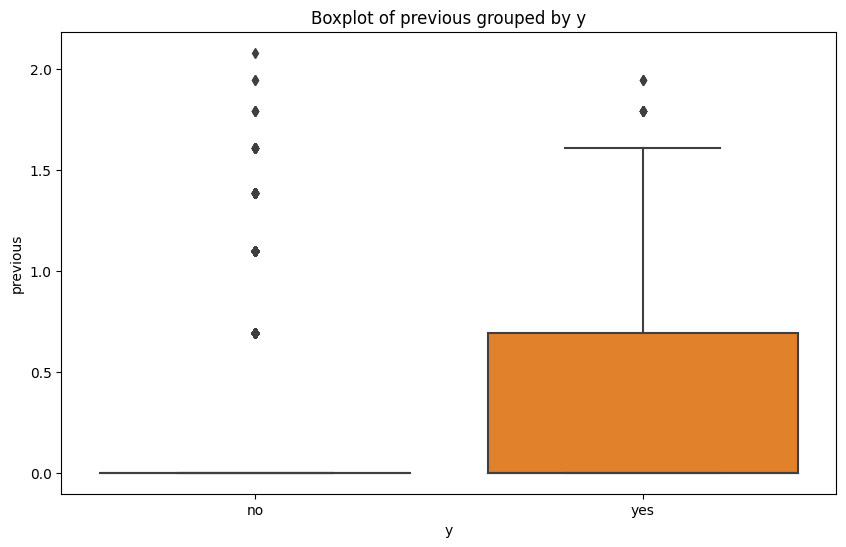

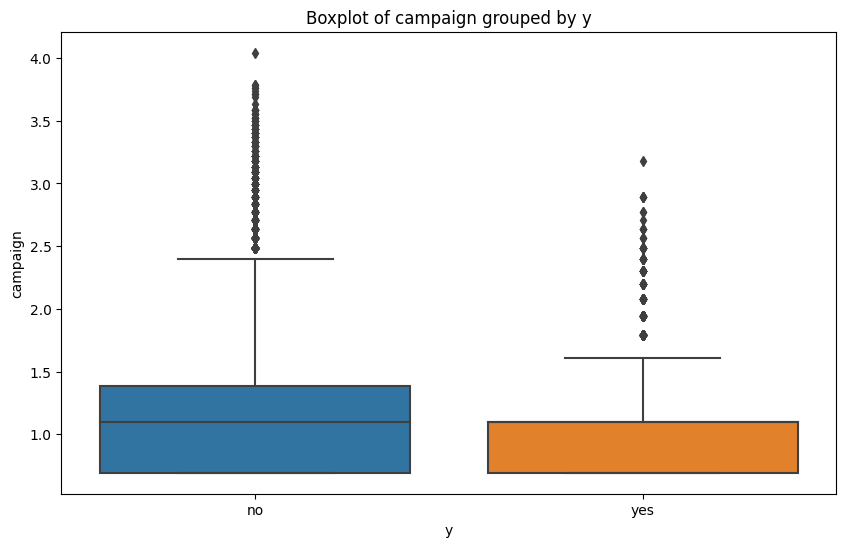

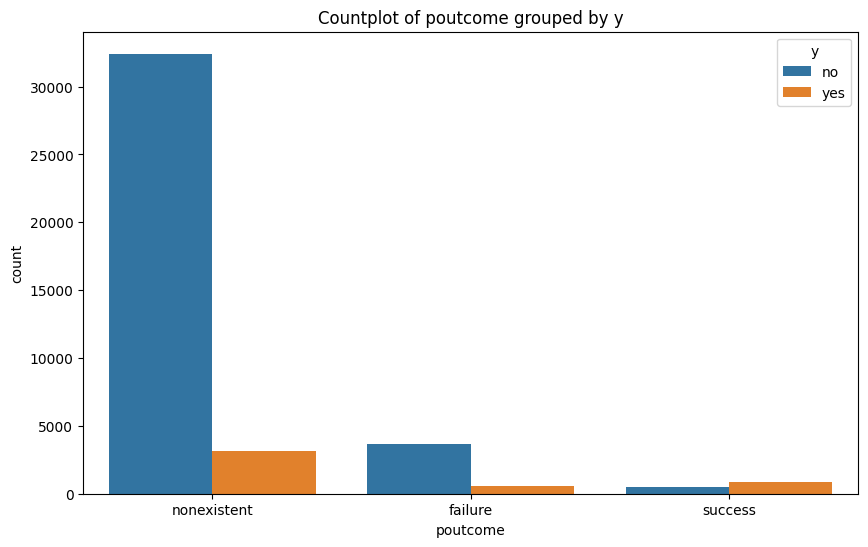

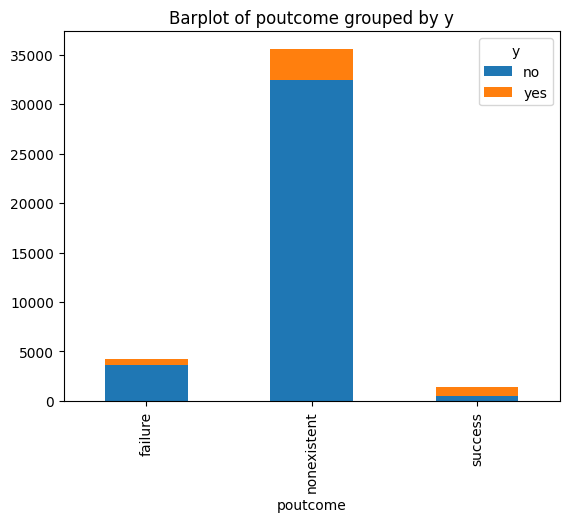

In [2]:
# Defining "df"
df = pd.read_csv('/kaggle/input/dataset-for-bta-419-2023/BTA_419_2023_Data.csv')

# Log transformation to address skewed data
df['previous'] = df['previous'].apply(lambda x: np.log(x+1))
df['campaign'] = df['campaign'].apply(lambda x: np.log(x+1))

# Boxplots for 'previous' and 'campaign'
for col in ["previous", "campaign"]:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'Boxplot of {col} grouped by y')
    plt.show()

# Countplot for 'poutcome'
plt.figure(figsize=(10,6))
sns.countplot(x='poutcome', hue='y', data=df)
plt.title('Countplot of poutcome grouped by y')
plt.show()

# Barplot for 'poutcome'
poutcome_counts = df.groupby(['y', 'poutcome']).size().unstack(level=0)
poutcome_counts.plot(kind='bar', stacked=True)
plt.title('Barplot of poutcome grouped by y')
plt.show()

Immediately, we see that the data is somewhat incoherent, containing many outliers in the case of the boxplots. We also uncovered a fairly large part of "poutcome" containing nonexistent as the outcome. Generally, it seems that there is weak evidence to suggest much correlation between any of these variables and our independent variable. However, further analysis is needed to verify this. Additionally, there may indirect correlations which need to be accounted for. 

With this insight, we can now continue by; 
1. verifying the weak linear correlation just inferred, and 
2. running a machine learning algorithm to understand what non-linear correlations may exist.

## Verifying Linear Correlation Assumptions

The following figure was run to analyze the correlation between different numerical variables in the dataframe 'df'. Correlation provides an indication of how related two variables might be. It can be a useful tool to identify the relationships between variables, which can be critical in many situations like feature selection, multivariate analysis, and model building in predictive analytics.

We will focus on the following predictors for the remainder of this analyis:

* **'previous'**: the number of times a customer was contacted before the current campaign or period.
* **'poutcome'**: the outcome of the previous marketing campaign (e.g., "success," "failure").
* **'campaign'**: the number of contacts performed during the current marketing campaign for a specific client.

/tmp/ipykernel_20/1971348184.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'poutcome'] = le.fit_transform(df['poutcome'])


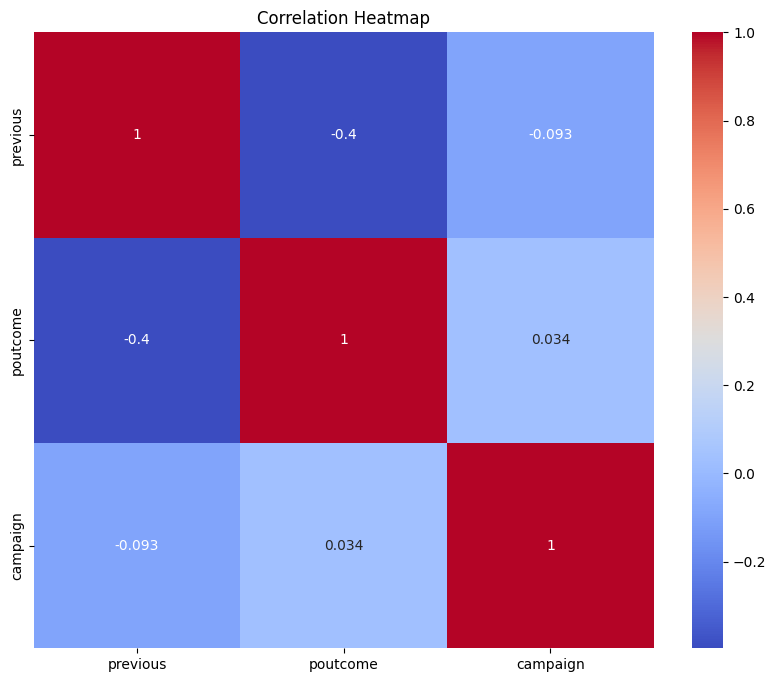

In [3]:
# Selecting the features
selected_df = df[['previous', 'poutcome', 'campaign']]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.loc[:, 'poutcome'] = le.fit_transform(df['poutcome'])
selected_df = df[['previous', 'poutcome', 'campaign']]


# Calculate the correlation
correlation = selected_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

We see here in our heatmap that our predictor variables have a considerably low correlation. Correlation measures linear relationships between variables, but decision trees can capture non-linear relationships as well. For example, there might be a specific combination of 'previous', 'poutcome', and 'campaign' values that predict a high likelihood of term deposit subscription, and a decision tree model could potentially capture this. Because of this, we will also run our predictor variables through a decision tree model to capture the non-linear perspective.

## Uncovering Non-Linear Correlation

### Creating the Machine Learning Model

For our use case, the predictors we will be using are ‘previous’, ‘poutcome’, and ‘campaign’. These variables are being selected based on our previous data exploration phase, which although suggests weak linear correlation, may still prove to yield significant nonlinear correlations. This is in addition to their importance to answering the business question at hand.

### Prediction Method
When it comes to choosing between Logistic Regression or Decision Trees for our question at hand, the most ideal method would be the Decision Tree model.
Reasoning for this decision include these strengths of the Decision Tree:
1. **Categorical Handling:** Categorical variables are a built-in feature with Decision Trees, and because the dataset contains many categories, it would be most compatible with this model.

2. **Interpretability:** Decision trees are opinionated and offer clear, concise rules. This allows for easy interpretability when we use the model to make predictions about campaign effectiveness (Bock).

3. **Interaction Handling:** Decision Trees can account for interactions between multiple variables, which would be beneficial when looking to see how economic variables affect term loan rates. For example, it would be of interest to look into the role of age and occupation in tandem with the number of previous contacts.

That having been said, a flaw that Decision Trees exhibit is that they’re prone to overfitting (Kunani). It can be mitigated by maintaining a shorter tree or setting constraints on the maximum depth and/or minimum samples per leaf. Additionally, while Logistic Regression might not be an ideal choice for the question at hand, it’s a popular and useful method for simple classification.

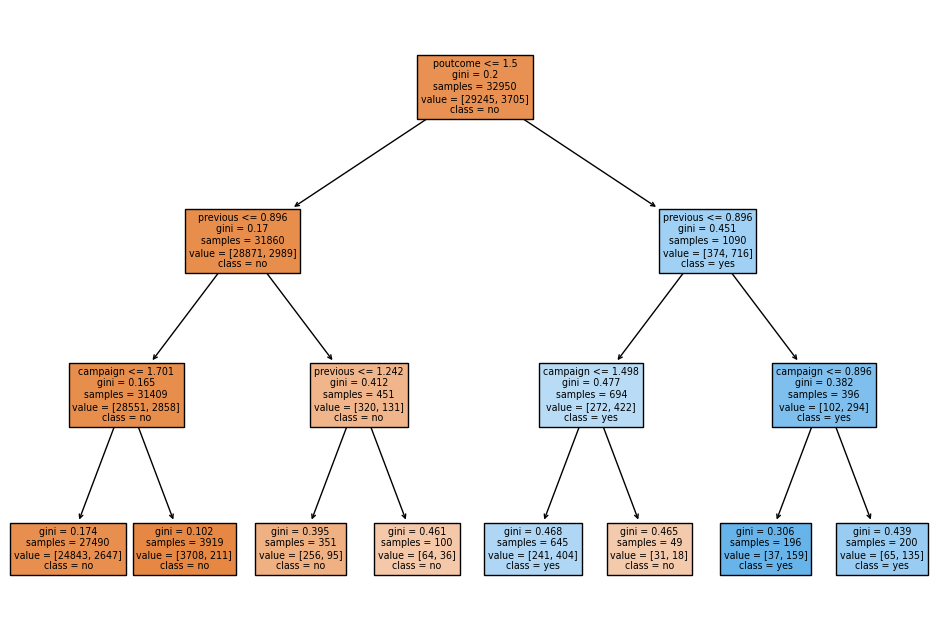

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7303
         yes       0.64      0.18      0.28       935

    accuracy                           0.90      8238
   macro avg       0.77      0.58      0.61      8238
weighted avg       0.87      0.90      0.87      8238

Accuracy Score: 0.8954843408594318


In [4]:
# Selecting variables for prediction 
selected_features = ['previous', 'poutcome', 'campaign']

# Creating Dummy Variables for Categorical Features
df_dummies = pd.get_dummies(df[selected_features])

# Predictor and Target Variables
X = df_dummies
y = df['y']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fitting the model
dt_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = dt_model.predict(X_test)

# Plotting the tree
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(dt_model, feature_names=X_train.columns, class_names=[str(cls) for cls in dt_model.classes_], filled=True, ax=ax)
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Accuracy Score
print('Accuracy Score:', accuracy_score(y_test, y_pred))

### Model Performance

**Classification Report:** This provides precision, recall, and F1-score for each class. Precision is the measurement of positive predictions that were, in fact, correct. Recall indicates how many actual positives the model managed to capture. The F1-score is a balanced representation of precision and recall (Scikit-Learn).

**Accuracy Score:** This is the fraction of correct predictions made by the model (Scikit-Learn). For our model, the accuracy score is approximately 0.89. The model performed well in predicting 'no' outcomes, with a precision of 0.90 and recall of 0.99. However, the model performed very poorly at predicting 'yes' outcomes, with a much lower precision of 0.64 and a recall of 0.18.

As it stands, the model appears to have significant room for improvement, specifically in its performance predicting 'yes' outcomes. A potential solution could be to implement a more balanced dataset or to fine-tune the model's parameters. Further analysis of the feature importances might also help in refining the model for better performance.

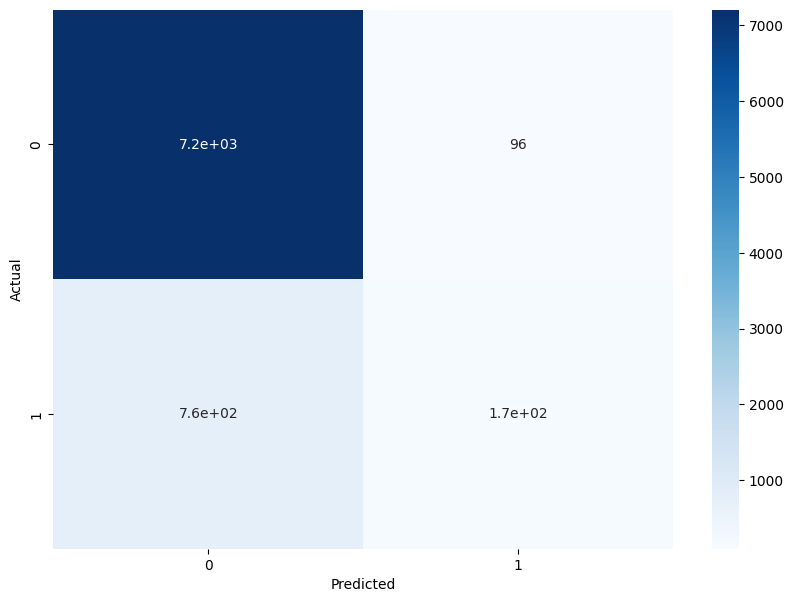

+----+-----------+--------------+
|    | feature   |   importance |
|----+-----------+--------------|
|  0 | previous  |    0.0621157 |
|  1 | poutcome  |    0.907802  |
|  2 | campaign  |    0.0300826 |
+----+-----------+--------------+


In [5]:
# Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Analyzing the feature importances
importances = dt_model.feature_importances_ # <- This line has been corrected
feature_names = X.columns

# Create a DataFrame to view the importances
importance_df = pd.DataFrame({"feature": feature_names, "importance": importances})

print(tabulate(importance_df, headers='keys', tablefmt='psql'))

## Analysis Findings

### Classification and Accuracy Report
Precision for the "yes" class is 0.64, which means that among the predicted "yes" values, approximately 64% are actually true positives (clients who subscribed). Recall for the "yes" class is 0.18, which means that the model only correctly identifies approximately 18% of the actual "yes" values (clients who subscribed).

These values suggest that the campaign's effectiveness for people who have been previously contacted is relatively low. The precision value of 0.64 indicates that out of all the clients predicted as "yes," only around 64% actually subscribed. The low recall value of 0.18 suggests that the model misses a significant portion of clients who would have subscribed.

In contrast, for people who haven't been previously contacted, the precision and recall values are significantly higher, as indicated by the high f1-score and support values in the classification report. Overall, based on the provided information, campaigns for people who have been previously contacted appear to be less effective compared to those who haven't been previously contacted. Based on this, campaigns for people who have been previously contacted appear to be less effective compared to those who haven't been previously contacted.

It's also important to note that feature importances showed that the previous contact variable was the most important predictor of a "yes" outcome. This suggested that people who have been contacted by the marketing campaign in the past were more likely to respond positively to the campaign in the future. Therefore, it is reasonable to say that there is an advantage in securing a "yes" outcome compared to people not previously contacted.

### Feature Importance Results

With respect to the feature importance, we find that there is indeed a non-linear correlation happening behind the scenes. The "poutcome" variable being of particular interest, as it has an importance of 90%, suggesting a very strong correlation with our indepent variable.

The effect of predictors on the outcome is gauged by the feature importances. Feature importance is a score for each feature or fascet of data, with higher scores indicating the more critical a feature is for the output variable (Shin). Here, the variable 'poutcome' (previous outcome) appears to be the most influential in predicting whether or not a term deposit will be subscribed to, followed by 'previous' (number of contacts performed before this campaign), and then 'campaign' (number of contacts performed during this campaign).

# Closing

### Summary and Review
In this analysis, the business question that was focused on was evaluating the effectiveness of campaigns for individuals who had been previously contacted. To answer this question, the dataset was examined, which consisted of a wide range of datatypes. The outcome variable of interest was 'y', representing term deposit subscription, while the primary independent variable was 'previous', indicating the number of previous contacts with a person.

The analysis began with a correlation heat map, which visually represented the linear relationships between variables. Potential strong positive or negative correlations between predictor variables and the outcome variable provided insights into the effectiveness of campaigns for individuals who had been previously contacted. However, we found no such correlations and thus moved on to look for non-linear correlations.

A decision tree model was used to capture non-linear interactivity or correlations between variables. This model utilized the same variables as predictors, with 'y' remaining the target variable. By examining the structure of the decision tree and the importance of each predictor variable, valuable insights were gained regarding campaign effectiveness.

The amalgamation of the correlation heat map and the decision tree model enables a comprehensive understanding of the effectiveness of campaigns for people who have been previously contacted. The correlation heat map highlights linear relationships, while the decision tree model uncovers non-linear interactions and patterns, thereby facilitating the identification of key factors that influence campaign effectiveness.

### Synopsis and Recommendations
In the end, our study was hindered by a significant delta in our model’s ability to predict outcomes for ‘no’ relative to ‘yes’, due to the high support for the former and low support for the latter. Nevertheless, some valuable information was still obtained in this process to answer ”How effective are our campaigns for people who have been previously contacted?".

Critically, we found that our campaigns were actually ineffective in securing previous clients for term deposits that answered ‘no’. The only demographic that suggests any significant positive outcome are those previous clients that have already subscribed. This indicates that there may be room for growth and reform in the way both campaign management and client management is handled. Further research is needed to determine an exact area of improvement; whether it be which clients are taken on, how clients are being interacted with, or other factors.


# Works Cited
Bock, Tim. “Decision Trees Are Usually Better Than Logistic Regression.” Displayr,
https://www.displayr.com/decision-trees-are-usually-better-than-logistic -regression/. Accessed 20 May 2023.

Euribor Rates. Euribor rates - all information on Euribor, https://www.euribor-rates.eu/en/. Accessed 19 May 2023.

Shin, Terence. “Understanding Feature Importance and How to Implement it in Python.” Towards Data Science, https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285. Accessed 8 June 2023.

Scikit-Learn. “sklearn.metrics.precision_recall_fscore_support — scikit-learn 1.2.2 documentation.” Scikit-learn, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support. Accessed 8 
June 2023.

Skikit-Learn. “sklearn.metrics.precision_recall_fscore_support — scikit-learn 1.2.2 documentation.” Scikit-learn, 

Kunani, R. “Decision Trees and Random Forests.” HackMD, https://hackmd.io/@rkunani/decision-tree. Accessed 20 May 2023.

# Appendix

*While the following was not used in the study, I have found it to provide interesting insights. Given that there was a severe imbalance in support for "no" outcomes compared to "yes" outcomes, I wondered what tools were available to address this problem elegantly. Further research points to the use of oversampling, SMOTE, weights, and more. These new models change the classification reports considerably:*

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [7]:
# Creating Dummy Variables for Categorical Features
df_dummies = pd.get_dummies(df[selected_features])

# Predictor and Target Variables
X = df_dummies
y = df['y']

# Convert 'yes' and 'no' to 1 and 0
le = LabelEncoder()
y = le.fit_transform(y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Defining the Decision Tree Model with class_weight='balanced'
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42, class_weight='balanced')

# Fitting the model
dt_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = dt_model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# ROC AUC Score
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.98      0.71      7332
           1       0.90      0.23      0.36      7288

    accuracy                           0.60     14620
   macro avg       0.73      0.60      0.54     14620
weighted avg       0.73      0.60      0.54     14620

ROC AUC Score: 0.6019518517387354


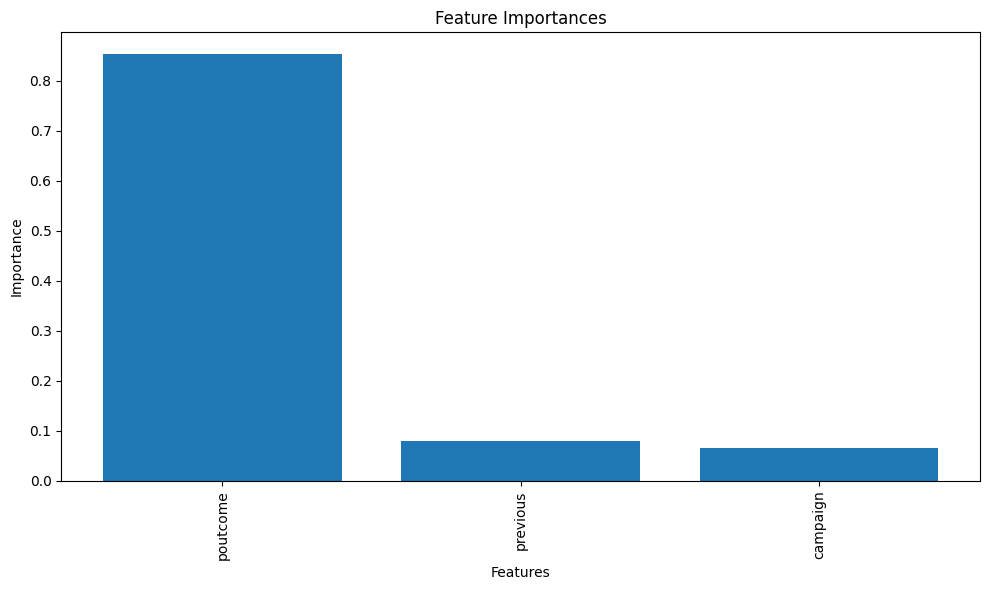

In [8]:
# Feature importances
importances = dt_model.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [9]:
# Creating Dummy Variables for Categorical Features
df_dummies = pd.get_dummies(df[selected_features])

# Predictor and Target Variables
X = df_dummies
y = df['y']

# Convert 'yes' and 'no' to 1 and 0
le = LabelEncoder()
y = le.fit_transform(y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Perform grid search to find optimal hyperparameters for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, None]
}

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_sm, y_sm)

# Best hyperparameters from grid search
best_params = grid_search.best_params_

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Defining the Random Forest Model with best hyperparameters
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', **best_params)

# Fitting the model
rf_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# ROC AUC Score
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.89      0.69      7332
           1       0.74      0.33      0.46      7288

    accuracy                           0.61     14620
   macro avg       0.66      0.61      0.58     14620
weighted avg       0.66      0.61      0.58     14620

ROC AUC Score: 0.607575666387003


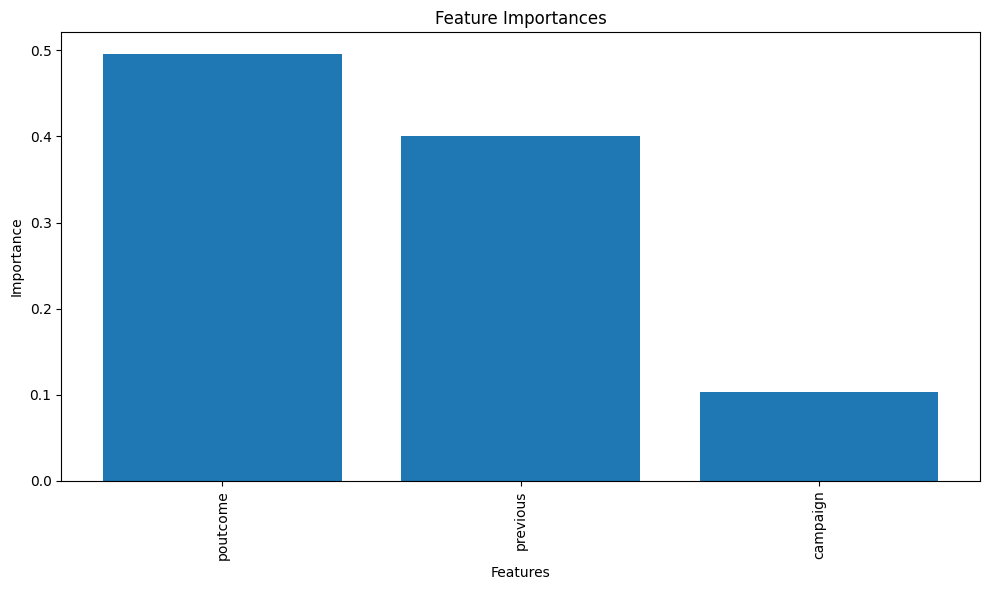

In [10]:
# Feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

*For the first model, it retains that the 'poutcome' variable is highly correlated. However, the more aggresive model suggests this is not the case. Interestingly though, 'previous' gains considerable correlation rates. This is something that none of the models thus have have picked up on.*

*Also notable is that both ROC AUC Scores suggest that these models are just 10% better than guessing (guessing being 50%).*